In [1]:
# Import image libraries
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

## Step 0 - Load image

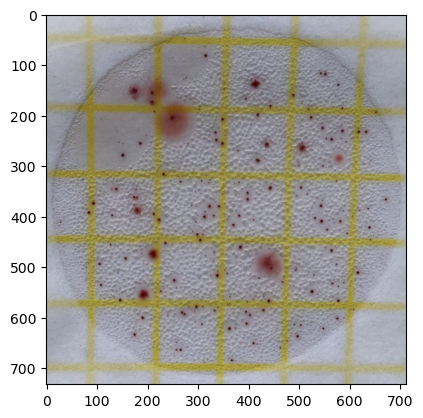

In [2]:
# Open the image file
img_path = 'data/sample_1.png'
img_path_mini = 'data/sample_1_mini.png'

with Image.open(img_path) as img:
    img_array = np.array(img)

# Display image img_array
plt.imshow(img_array);

## Step 1 - Convert the image to a 2D array

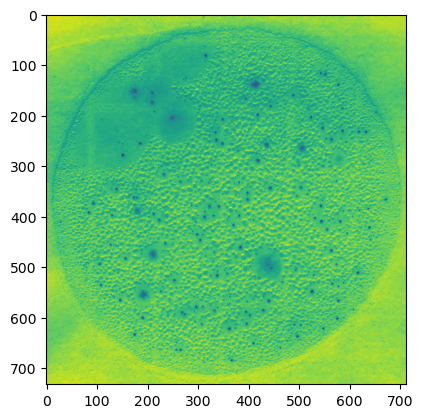

In [3]:
# Extract the red channel
red_channel = img_array[:,:,0]
red_channel.shape

# Display image img_array
plt.imshow(red_channel);

## Step 2 - Filter redish pixels

### Apply mask based on THRESHOLD

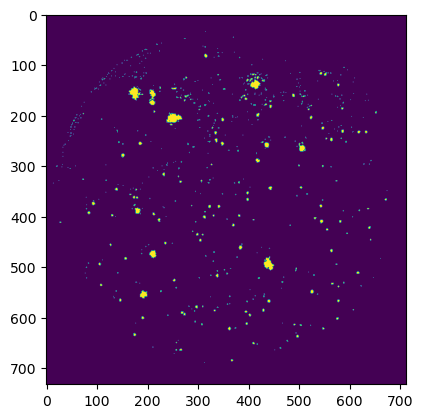

In [7]:
# Define the threshold to calibrate the filter
THRESHOLD = 109

# Apply the threshold
red_filter = red_channel < THRESHOLD

# Transform from bool to int
red_filter_int = 1 * red_filter

# Display the thresholded image
plt.imshow(red_filter);

### Get coordinates of the filtered (red) points

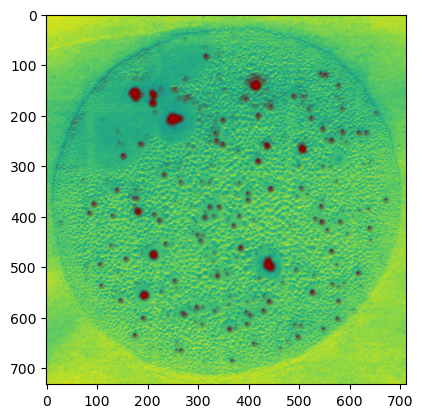

In [112]:
X = np.where(red_filter)
plt.imshow(red_channel)
plt.scatter(X[1], X[0], c='r', s=10, alpha=0.01);

## Step 3 - Train clustering model

In [113]:
# Apply DBSCAN to find the define the clusters
dbscan = DBSCAN(eps=5, min_samples=7)
dbscan.fit(np.array(X).T)

DBSCAN(eps=5, min_samples=7)

In [114]:
# Count unique labels
print("Number of red pixels:", len(set(dbscan.labels_)))
dbscan.labels_ += 1

Number of red pixels: 145


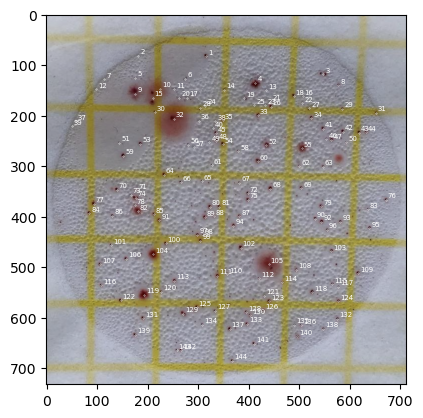

In [120]:
SHOW_CENTER = True

# Keep same random seed
np.random.seed(0)

# Display clusters on the image
plt.imshow(img_array)

# Add data on each cluster center
for label in set(dbscan.labels_):
    if label != 0:
        # Compute the center of the cluster
        cluster_center = np.mean(X[0][dbscan.labels_ == label]), np.mean(X[1][dbscan.labels_ == label])
        
        if SHOW_CENTER:
            # Add a point at the center of the cluster
            plt.scatter(cluster_center[1], cluster_center[0], c='white', s=.08, alpha=1)
        
        # Add the cluster number
        shift_text = 4
        plt.text(cluster_center[1] + shift_text, cluster_center[0] - shift_text, str(label), fontsize=5,  color='white')
